In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
import warnings

In [2]:
df=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\train.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data2\test.csv")

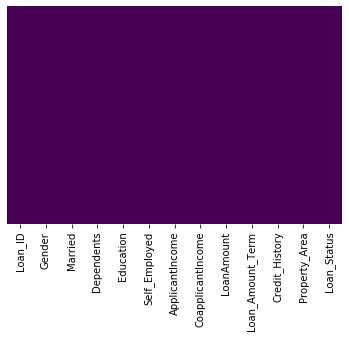

In [3]:
df1=df.dropna(axis=0)
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#Categoral values to Numerical Values

df1.Married.replace({"Yes":1,"No":0},inplace=True)

df1.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)

df1.Self_Employed.replace({"Yes":1,"No":0},inplace=True)

df1.Property_Area.value_counts()

df1.Property_Area.replace({"Semiurban":1,"Urban":2,"Rural":3},inplace=True)

df1.Loan_Status.replace({"Y":1,"N":0},inplace=True)

df1=df1.drop(["Loan_ID"],axis=1)

df1.Gender.replace({"Male":1,"Female":0},inplace=True)

df1.Dependents.replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)

C:\Users\SaurabhM\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
df1["TotalIncome"]=(df1["ApplicantIncome"]+df1["CoapplicantIncome"])/(df1["LoanAmount"]*df1["Loan_Amount_Term"])


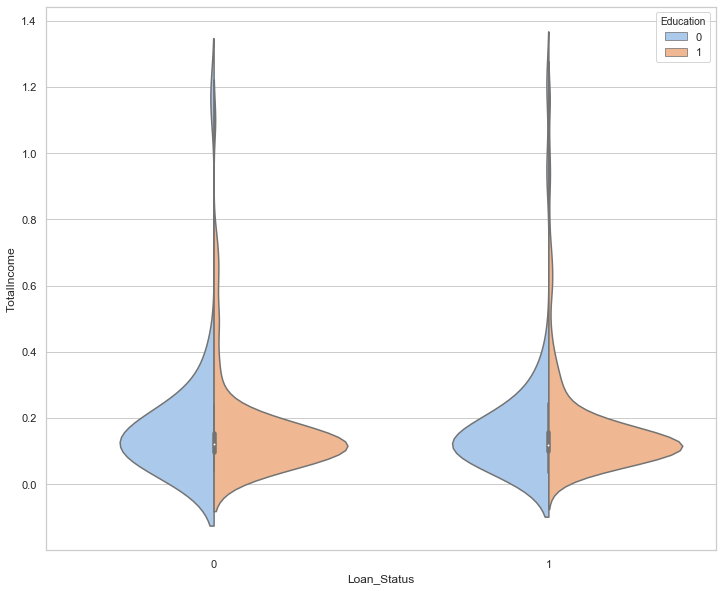

In [6]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome", x="Loan_Status",hue="Education" ,data=df1,split=True)

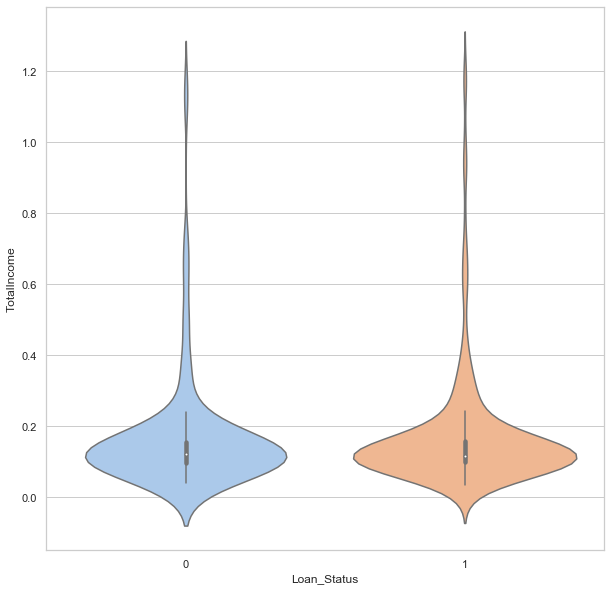

In [7]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome", x="Loan_Status", data=df1)

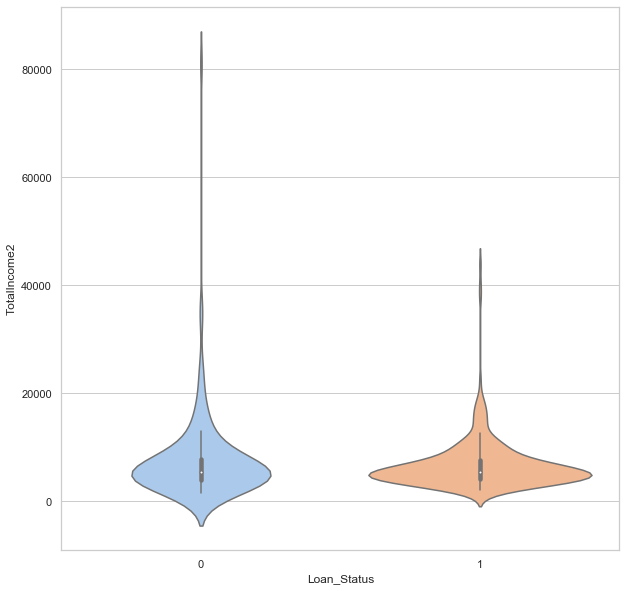

In [8]:
df1["TotalIncome2"]=(df1["ApplicantIncome"]+df1["CoapplicantIncome"])
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome2", x="Loan_Status", data=df1)

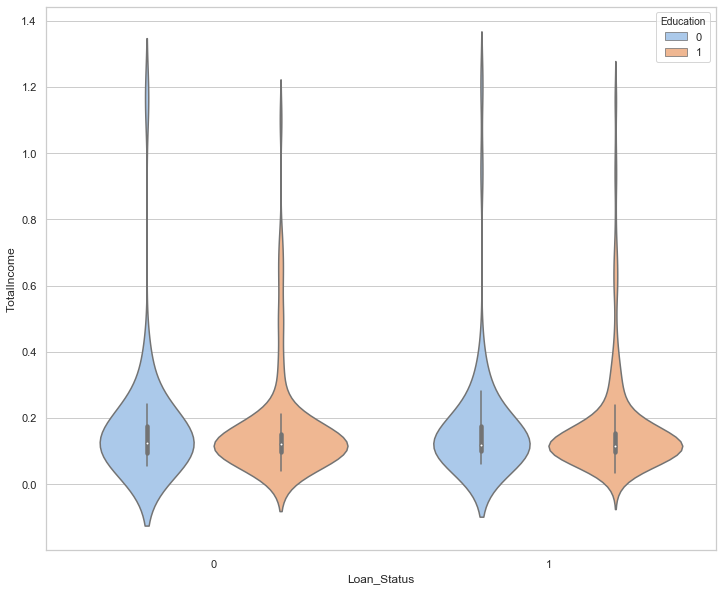

In [9]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome", x="Loan_Status",hue="Education" ,data=df1,split=False)

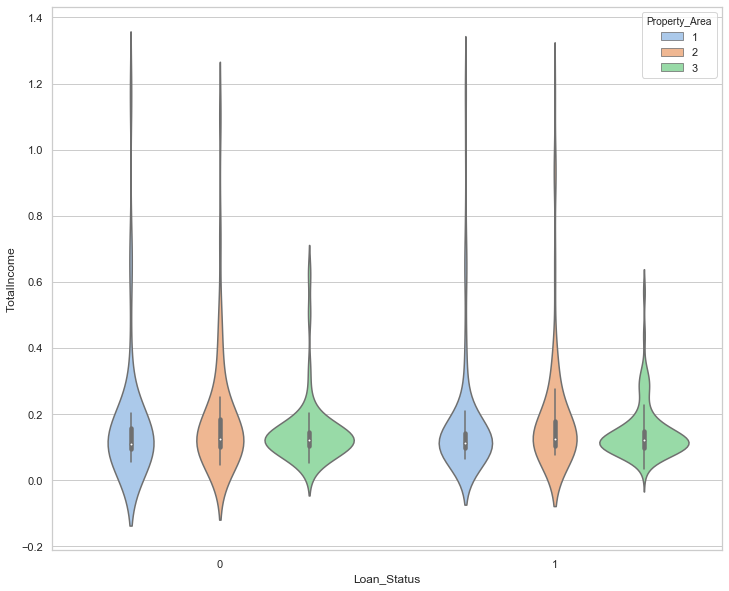

In [10]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome", x="Loan_Status",hue="Property_Area" ,data=df1,split=False)



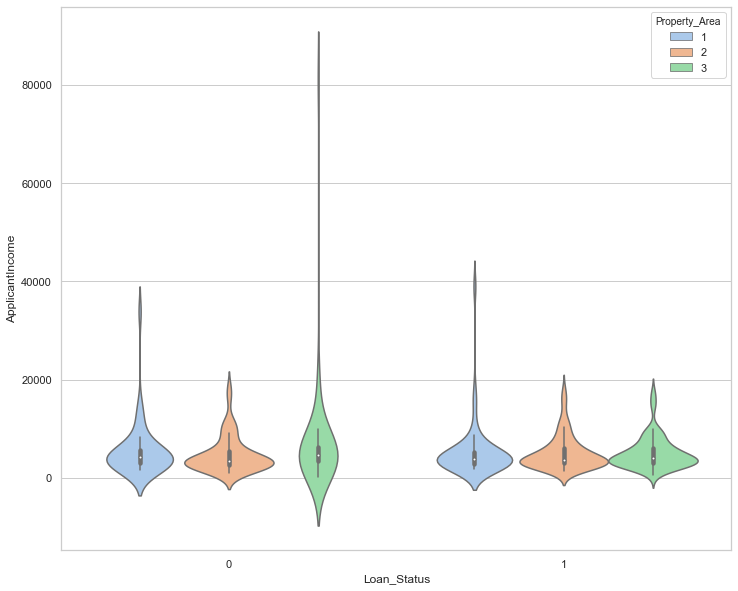

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="ApplicantIncome", x="Loan_Status",hue="Property_Area" ,data=df1,split=False)



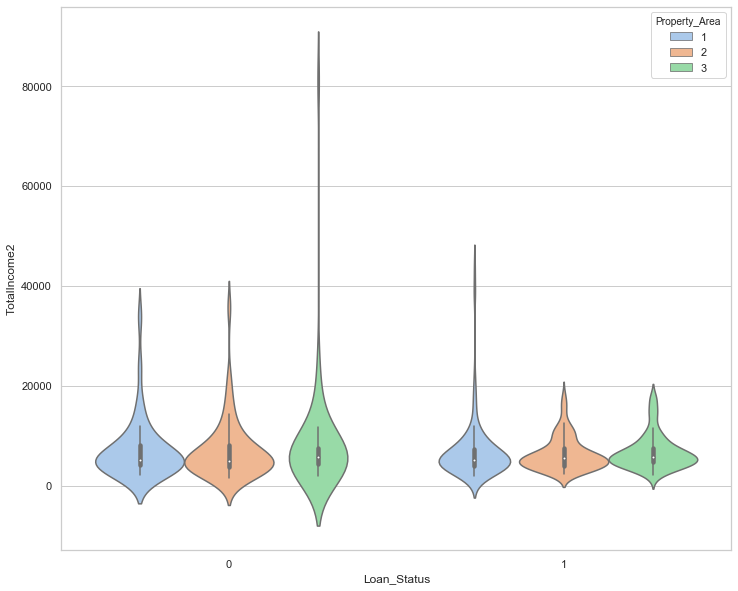

In [12]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome2", x="Loan_Status",hue="Property_Area" ,data=df1,split=False)



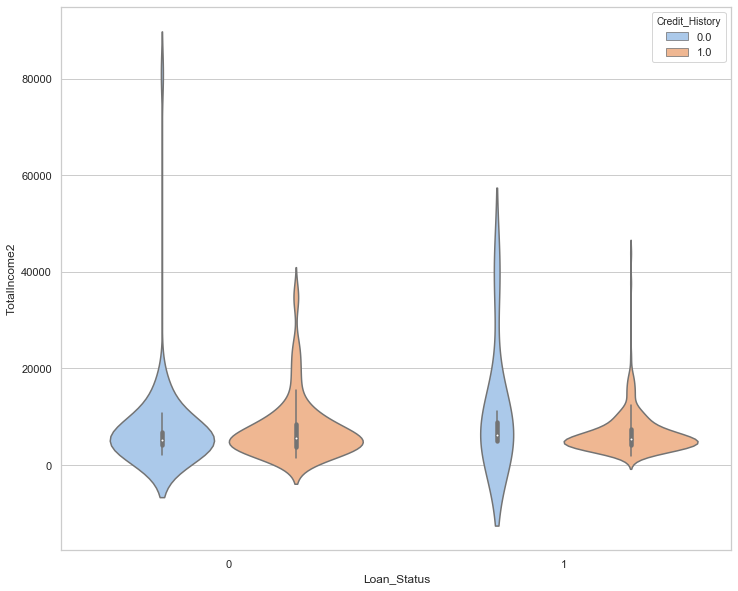

In [13]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome2", x="Loan_Status",hue="Credit_History" ,data=df1,split=False)


In [14]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0,0.132183,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,0.126263,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0.114375,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0.118203,6000.0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,0.100010,9613.0


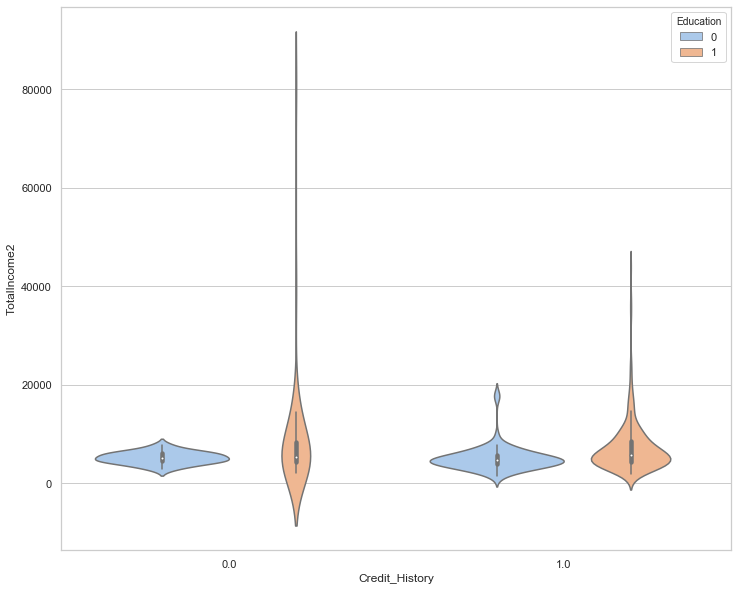

In [15]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome2", x="Credit_History",hue="Education" ,data=df1,split=False)


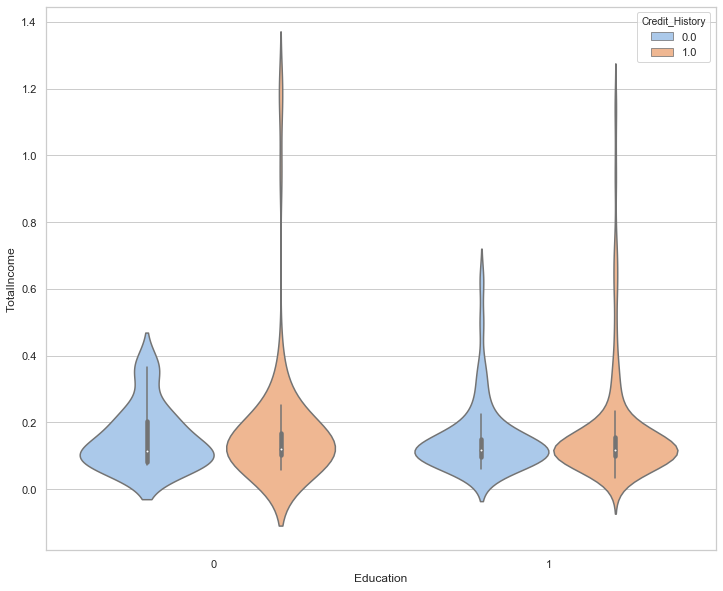

In [19]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome", x="Education",hue="Credit_History" ,data=df1,split=False)


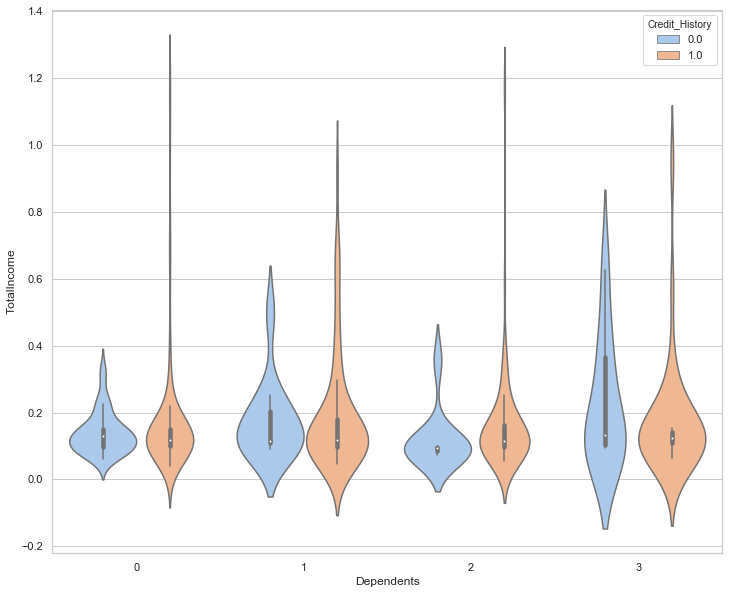

In [20]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome", x="Dependents",hue="Credit_History" ,data=df1,split=False)


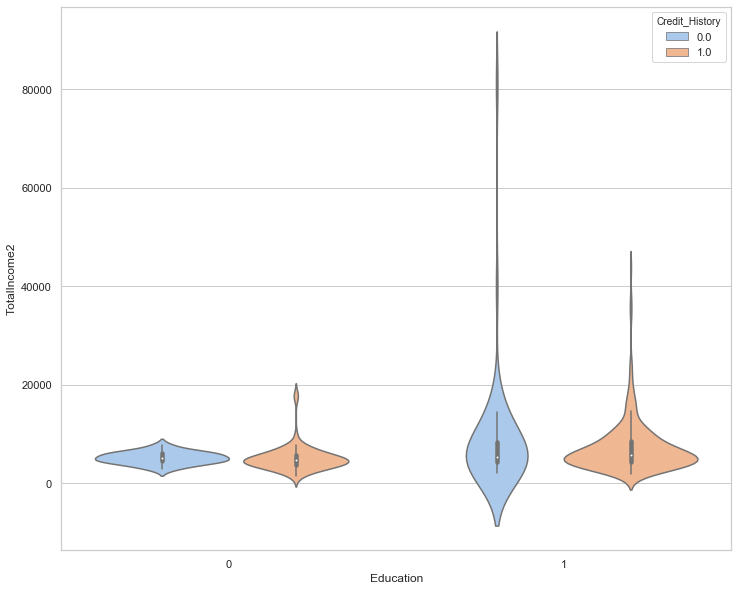

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(y="TotalIncome2", x="Education",hue="Credit_History" ,data=df1,split=False)
